REFERENCE: graph2vec: Learning Distributed Representations of Graphs

In [6]:
import sys
sys.path.append('/home/juan/Research/Codes/Process Mining')

import os
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
import pm4py
import numpy as np
from PetriNet2Vec import PetriNet2Vec
import matplotlib
import matplotlib.pyplot as plt

pm4py.util.constants.SHOW_PROGRESS_BAR = False
import warnings
warnings.filterwarnings('ignore')

Loading Petri Nets models (dataset)

In [7]:
# PNML Embedding Parameters
# tests with 16 and 32
embedding_dim = 32
neg_sampling = 2

models = sorted(os.listdir('../Dataset/Models/'))
petriNets = []
petriNets_im = []
petriNets_fm = []
for model in models:
    net, im, fm = pm4py.read_pnml(os.path.join('../Dataset/Models/', model))
    petriNets.append(net)
    petriNets_im.append(im)
    petriNets_fm.append(fm)

Fitting a PetriNet2Vec model

In [8]:
model = PetriNet2Vec(embedding_dim = embedding_dim, negative_sampling = neg_sampling, seed = 42)
model.fit(petriNets, epochs = 1)
old = normalize(model.get_net_embeddings().copy())

distances = []
for i in range(20):
    model.fit(petriNets, epochs = 100)
    new = normalize(model.get_net_embeddings().copy())
    distances.append(np.linalg.norm(new-old)) # when are matrizes, this is the Frobenius norm
    old = new.copy()
    print(i, distances[-1])

0 12.194273
1 2.7122383
2 1.7458359
3 1.6504966
4 1.5491577
5 1.5246891
6 1.5453812
7 1.4886222
8 1.4901487
9 1.5087698
10 1.5315473
11 1.5316359
12 1.5076973
13 1.4580343
14 1.533366
15 1.5113381
16 1.4982992
17 1.5056005
18 1.5420667
19 1.5382521


Frobenius norm between subsequents training epochs

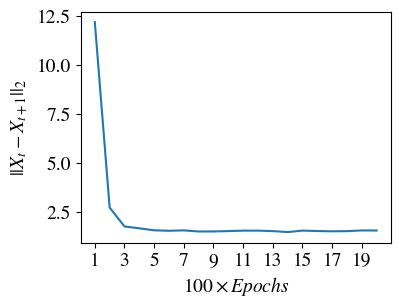

In [9]:
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(4,3))
plt.plot(distances)
plt.xlabel(r'$100 \times Epochs$')
plt.ylabel(r'$||X_t - X_{t+1}||_2$')
plt.xticks(np.arange(0,len(distances),2), np.arange(1,len(distances)+1,2))
plt.show()

Minimum number of dimensions which retains 95% of information

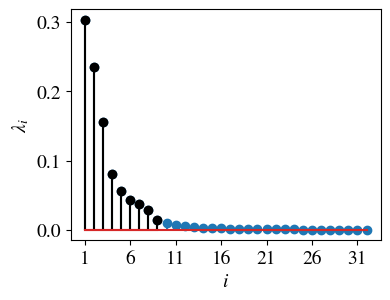

In [11]:
def variance_retained(eigenvalues):
    eigenvalues = np.cumsum(eigenvalues/np.sum(eigenvalues))
    for i, value in enumerate(eigenvalues):
        if value > 0.95:
            return i, value
        
embeddings_vectors = normalize(model.get_net_embeddings().copy())
X = StandardScaler().fit_transform(embeddings_vectors)
U, S, Vh = np.linalg.svd(X.T@X)
S = S/np.sum(S)
i, h_line = variance_retained(S)

plt.figure(figsize=(4,3))
plt.stem(S)
plt.stem(S[0:i+1],'k')
plt.xlabel(r'$i$')
plt.ylabel(r'$\lambda_i$')
plt.xticks(np.arange(0,embedding_dim,5), np.arange(1,embedding_dim+1,5))
plt.show()